# LAB 2

# Read the file into python as dataframe

In [1]:
import pandas as pd

file1 = pd.read_csv('marketing_customer_analysis.csv')
file1.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Show the DataFrame's shape.

In [2]:
file1.shape

(10910, 26)

# Standardize header names

In [3]:
#Lowercase columns 
lst1 = []
for col in file1.columns:
    lst1.append(col.lower())
file1.columns = lst1 

#Rename Columns 
file1 = file1.rename(columns={'state':'st'})

#drop unnamed column:
file1 = file1.drop(['unnamed: 0'], axis=1)

file1.columns

Index(['customer', 'st', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

# Which columns are numerical?

In [4]:
file1.dtypes

customer                          object
st                                object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [5]:
file1._get_numeric_data().columns.tolist()


['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [6]:

file1_num = file1._get_numeric_data()
file1_num


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


# Which columns are categorical?

In [7]:
file1.select_dtypes(include=['object']).columns.tolist()

['customer',
 'st',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size',
 'vehicle type']

In [8]:
file1_cat= file1.select_dtypes(['object']) 
file1_cat


,customer,st,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


# Check and deal with `NaN` values

In [9]:
file1.isnull().values.any()

True

In [10]:
#check by columns just in the numerical data:
file1_num.isna().sum()


customer lifetime value            0
income                             0
monthly premium auto               0
months since last claim          633
months since policy inception      0
number of open complaints        633
number of policies                 0
total claim amount                 0
dtype: int64

In [11]:
# percentage of NaN over total data
# round(file1_num.isna().sum()/len(file1_num),4)*100

nulls_df = pd.DataFrame(round(file1_num.isna().sum()/len(file1_num),4)*100)

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer lifetime value,0.0
1,income,0.0
2,monthly premium auto,0.0
3,months since last claim,5.8
4,months since policy inception,0.0
5,number of open complaints,5.8
6,number of policies,0.0
7,total claim amount,0.0


In [12]:
#drop columns with Null over 50% , not in this case
columns_drop = nulls_df[nulls_df['percent_nulls']>50]['header_name']
columns_drop

Series([], Name: header_name, dtype: object)

Let's see how many NaN values are in both "number of open complaints" and "months since last claim"	

In [13]:
file1["number of open complaints"].value_counts(dropna=False)

0.0    8160
1.0    1145
NaN     633
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [14]:
file1["months since last claim"].value_counts(dropna=False)

NaN     633
3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
19.0    276
23.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months since last claim, dtype: int64

How do we substitute/eliminate those NaN ? checking the original file1 dataset we see that where NaN happens in "number of open complaints" also happens in"months since last claim". I checked few rows,...
I am dropping NaN rows from the data, also because i cant find a substitue valid for the type of observations( mean , median ...)


If after that there are still NaN , my assumption that NaN are in both columns same row will be wrong, fingers crossed !


In [15]:
file1 = file1.dropna()
print(file1["number of open complaints"].value_counts(dropna=False))
file1["months since last claim"].value_counts(dropna=False)

0.0    3592
1.0     516
2.0     197
3.0     135
4.0      75
5.0      28
Name: number of open complaints, dtype: int64


3.0     192
6.0     192
1.0     190
7.0     181
4.0     161
2.0     159
5.0     157
15.0    153
10.0    152
8.0     150
0.0     146
11.0    145
16.0    135
13.0    132
12.0    132
20.0    131
17.0    131
23.0    120
14.0    119
19.0    117
25.0    114
9.0     110
18.0    108
21.0    108
29.0    103
22.0    103
24.0    102
26.0    102
33.0     99
28.0     95
31.0     93
30.0     92
34.0     87
27.0     83
32.0     78
35.0     71
Name: months since last claim, dtype: int64

WE HAVE NO MORE NaN VALUES IN THE NUMERICAL as we thought 

# Swaping the NaN values for an average of the column (here is not applicable, but just for record) 

In [16]:
# import numpy as np

# #months since last claim
# mean_months_since_last_claim = file1_num['months since last claim'].mean()

# file1_num['months since last claim'] = round(file1_num['months since last claim'].fillna(mean_months_since_last_claim),4)

# #I dont know why ,  "month since last claim just appears in "file1_num", and not in the orginal "file1' ??" 

# #Nunmber of open compolaints
# mean_number_open_complaints = file1_num['number of open complaints'].mean()

# file1_num['number of open complaints'] = round(file1_num['number of open complaints'].fillna(mean_number_open_complaints),4)
# file1_num




In [17]:
file1.isna().sum()

customer                         0
st                               0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

# Datetime format :


Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February

In [18]:
import time
import datetime 
file1_cat['month'] = pd.DatetimeIndex(file1_cat['effective to date']).month
file1_cat['month'].unique()
print(file1_cat)
file1_cat[(file1_cat['month']==1) | (file1_cat['month']==2) | (file1_cat['month']==3)]


#or 

# file1_cat['month'] = file1_cat["effective to date"].dt.month_name()#
# file1_cat[(file1_cat["month"]=="January") | (file1_cat["month"]=="February") | (file1_cat["month"]=="March")]

      customer          st response  coverage education effective to date  \
0      DK49336     Arizona       No     Basic   College           2/18/11   
1      KX64629  California       No     Basic   College           1/18/11   
2      LZ68649  Washington       No     Basic  Bachelor           2/10/11   
3      XL78013      Oregon      Yes  Extended   College           1/11/11   
4      QA50777      Oregon       No   Premium  Bachelor           1/17/11   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor           1/19/11   
10906  KX53892      Oregon       No     Basic   College            1/6/11   
10907  TL39050     Arizona       No  Extended  Bachelor            2/6/11   
10908  WA60547  California       No   Premium   College           2/13/11   
10909  IV32877         NaN      NaN     Basic  Bachelor            1/8/11   

      employmentstatus gender location code marital status     policy type 

,customer,st,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN,2
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,2


In [19]:
import pandas as pd
file2 = pd.read_csv('marketing_customer_analysis.csv')

print(file2.head)
file2.shape

<bound method NDFrame.head of        Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentSta

(10910, 26)

# Create a function that does all the above and cleans the data :



In [20]:
def clean_data(df):
    lst1 =[]
    for col in df.columns:
        lst1.append(col.lower())
    df.columns = lst1 
    df = df.rename(columns={'state':'st'})
    df = df.drop(['unnamed: 0','number of open complaints','months since last claim'], axis=1)
    
    df['effective to date'] = pd.to_datetime(df['effective to date'], errors='coerce')
    df['month'] = pd.DatetimeIndex(df['effective to date']).month
    
    return df
    




In [21]:
df_3 = clean_data(file2)

In [22]:
print(df_3.shape)
df_3

(10910, 24)


,customer,st,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# LAB 3

In [23]:
data3 = pd.read_csv('marketing_customer_analysis.csv')

In [24]:
df3 = clean_data(data3)

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   st                             10279 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10279 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

['M' 'F']


# Describe DataFrame

In [26]:
df3.head()

,customer,st,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [27]:
df3.describe(include="all").T

/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_5477/3927934467.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df3.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
customer,10910,9134,ID89933,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
st,10279,5,California,3552,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer lifetime value,10910.0,NaN,NaN,NaN,NaT,NaT,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
response,10279,2,No,8813,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,10910,3,Basic,6660,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10910,5,Bachelor,3272,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective to date,10910,59,2011-01-10 00:00:00,239,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,10910,5,Employed,6789,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10910,2,F,5573,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,10910.0,NaN,NaN,NaN,NaT,NaT,37536.284785,30359.19567,0.0,0.0,33813.5,62250.75,99981.0


# Show a plot of the total number of responses

In [28]:
counts = df3['response'].value_counts()
counts


No     8813
Yes    1466
Name: response, dtype: int64

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


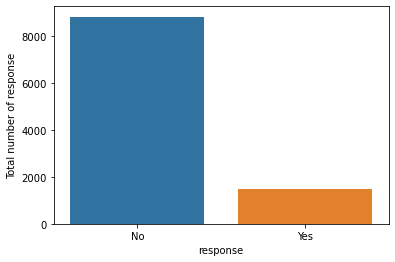

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot("response",data=df3)
plt.ylabel("Total number of response")
plt.show()

#other way of doing it:
# count = df3['response'].value_counts()
# yes = count['Yes']
# no = count['No']
# plt.bar(['No','Yes'],[no, yes], color = 'blue',  width = 0.5)
# plt.xlabel("response")
# plt.ylabel("Total number of response")
# plt.title("total number of responses")
# plt.show()




# Show a plot of the response rate by the sales channel

In [30]:
df3["sales channel"].value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales channel, dtype: int64

<AxesSubplot:xlabel='sales channel', ylabel='count'>

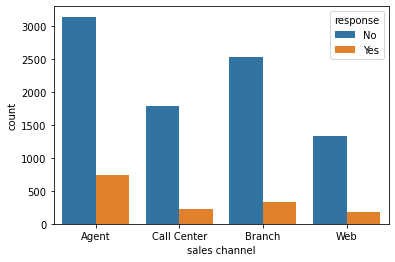

In [31]:

sns.countplot(data=df3, x="sales channel",hue= 'response')

# Show a plot of the response rate by the sales channel 2nd method.

As in the prev. graph we only show a response count, the rate needs to be calculated 


In [32]:
import numpy as np 

#We create a column:
df3['resp_rate'] = np.where(df3.response=='Yes',1,0)
df3.resp_rate.value_counts()

0    9444
1    1466
Name: resp_rate, dtype: int64

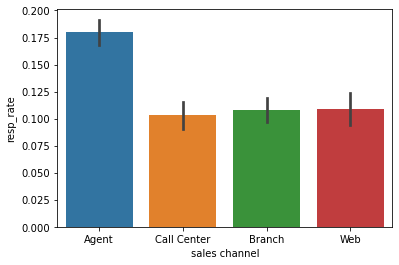

In [33]:
# df3.groupby("sales channel")['resp_rate'].mean().plot.bar()
# plt.show()

#or:
sns.barplot(data=df3, x="sales channel", y='resp_rate')
plt.show()



# Show a plot of the response rate by the total claim amount.


We create a column where all 'yes' from response becomes 1, and 'No' becomes 0

In [34]:
resp_mean = df3['resp_rate'].mean()
resp_mean

0.13437213565536205

We calculate the range of "total claim amount" to find out whats the dimesion, so we can divide in bins>

In [35]:
max_tcm = df3["total claim amount"].max()
min_tcm = df3['total claim amount'].min()

print(max_tcm)
print(min_tcm)

2893.239678
0.099007


This func transforms a column of "continuous" vble into bins, with some params as inputs. 

In [36]:
def categorize(col,min_val,max_val):
    labels = ["0-300", "300-600", "601-900", "901-1.2K","1.2k-1.5k", "1.5K-1.8K", "1.8-2.1K", "2.1K-2.4K", "2.4K-2.7K", "2.7K-3K"]
    bins = np.linspace(min_val, max_val,11)
    return pd.cut(col, bins, labels=labels)

df4 = categorize(df3['total claim amount'],0,3000)
print(df4)


0            0-300
1          601-900
2          300-600
3          300-600
4          601-900
           ...    
10905    1.2k-1.5k
10906        0-300
10907      300-600
10908      601-900
10909     901-1.2K
Name: total claim amount, Length: 10910, dtype: category
Categories (10, object): ['0-300' < '300-600' < '601-900' < '901-1.2K' ... '1.8-2.1K' < '2.1K-2.4K' < '2.4K-2.7K' < '2.7K-3K']


Now we are cocatenating the df with "total claim amount" in bins to the original DF as a new column called 'claim_bins'

In [37]:
df3['claim_bins'] = df4
df3

,customer,st,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,resp_rate,claim_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2,0,0-300
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1,0,601-900
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0,300-600
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1,300-600
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1,0,601-900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0,1.2k-1.5k
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0,0-300
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2,0,300-600
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0,601-900


Now we countplot the "claim_bins' with hue='response' => this will separate YES and NO responses by color ( visual response rate )

<AxesSubplot:xlabel='claim_bins', ylabel='count'>

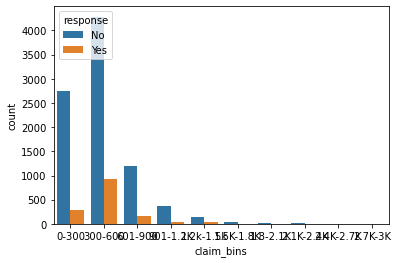

In [38]:
sns.countplot(data=df3, x="claim_bins",hue= 'response')

Another ploit, I am not sure which is more representative

Text(0, 0.5, 'resp_rate')

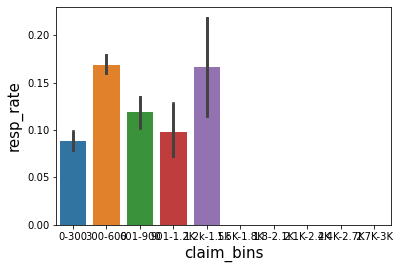

In [39]:
s = sns.barplot(data=df3, x='claim_bins', y='resp_rate')
sns.barplot(data=df3, x='claim_bins', y='resp_rate')
s.set_xlabel('claim_bins', fontsize=15)
s.set_ylabel('resp_rate', fontsize=15)

Show a plot of the response rate by income.

"income" is a vble that could be segmented in bins, we do the same process than before with the categorize function

In [40]:
max_income = df3["income"].max()
min_income = df3['income'].min()

df5 = categorize(df3['income'], min_income,max_income )
print(df5)

0        1.2k-1.5k
1              NaN
2          601-900
3        1.2k-1.5k
4          601-900
           ...    
10905          NaN
10906     1.8-2.1K
10907     901-1.2K
10908     1.8-2.1K
10909          NaN
Name: income, Length: 10910, dtype: category
Categories (10, object): ['0-300' < '300-600' < '601-900' < '901-1.2K' ... '1.8-2.1K' < '2.1K-2.4K' < '2.4K-2.7K' < '2.7K-3K']


Now we are cocatenating the  original DF with "income" in bins to the original DF as a new column called 'income_bins' 

In [41]:
df3['income_bins'] = df5


Now we countplot the "income_bins' with hue='response' => this will separate YES and NO responses by color ( visual response rate )

<AxesSubplot:xlabel='income_bins', ylabel='count'>

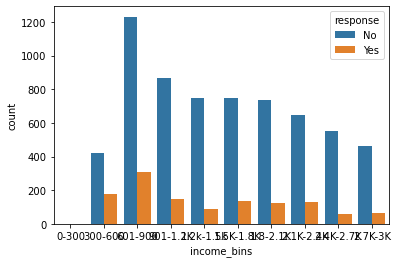

In [42]:

sns.countplot(data=df3, x="income_bins",hue= 'response')

Text(0, 0.5, 'resp_rate')

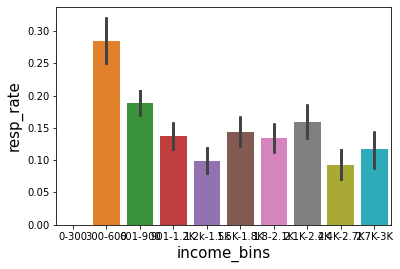

In [43]:
s = sns.barplot(data=df3, x='income_bins', y='resp_rate')
sns.barplot(data=df3, x='income_bins', y='resp_rate')
s.set_xlabel('income_bins', fontsize=15)
s.set_ylabel('resp_rate', fontsize=15)

# LAB 4



In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors


data4 = pd.read_csv('marketing_customer_analysis.csv')
lst1 =[]
for col in data4.columns:
    lst1.append(col.lower())
data4.columns = lst1 


df4 = clean_data(data4)


df4.dtypes




customer                                 object
st                                       object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since policy inception             int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                            object
total claim amount                      float64
vehicle class                           

DF with categorical columns: 'categoricals'

In [45]:
categoricals= data4.select_dtypes([np.object])
display(categoricals)
categoricals.shape

/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_5477/3776038489.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals= data4.select_dtypes([np.object])


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


(10910, 17)

DF with numerical values: 'numerical'

In [46]:
numerical = data4.select_dtypes([np.number])
display(numerical)
numerical.shape


,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


(10910, 9)

Now we will try to check the normality of the numerical variables visually


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


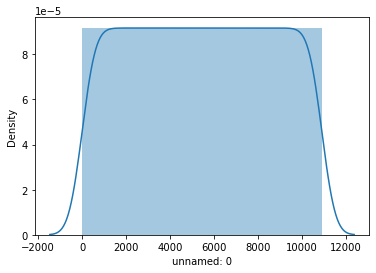

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


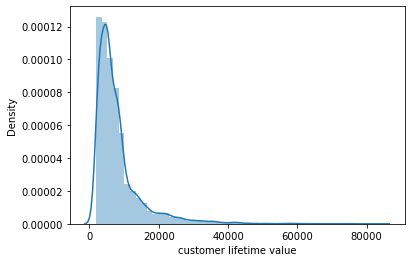

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


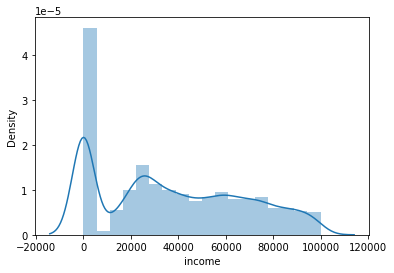

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


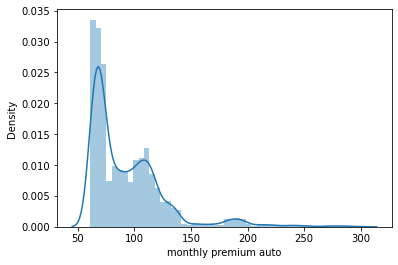

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


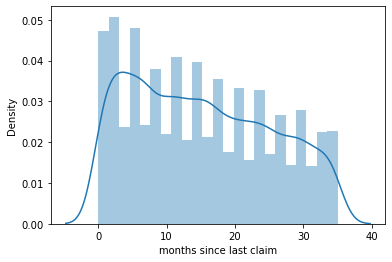

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


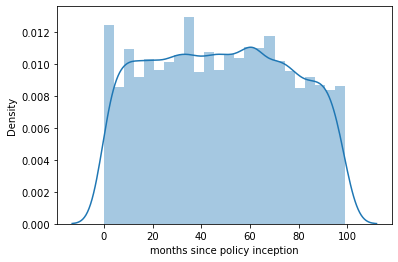

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


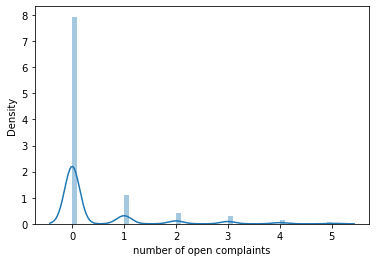

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


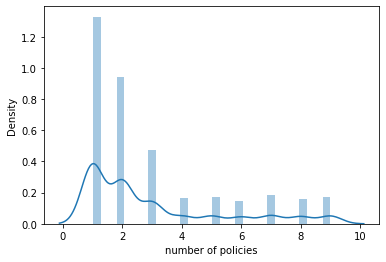

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


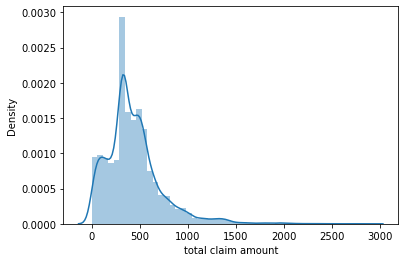

In [47]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

(array([1.205e+03, 1.033e+03, 8.480e+02, 1.334e+03, 1.238e+03, 5.570e+02,
        7.030e+02, 7.690e+02, 6.630e+02, 3.150e+02, 2.500e+02, 1.790e+02,
        1.660e+02, 1.930e+02, 1.610e+02, 1.180e+02, 1.180e+02, 1.090e+02,
        7.200e+01, 6.500e+01, 5.500e+01, 5.400e+01, 6.700e+01, 5.300e+01,
        5.800e+01, 5.400e+01, 3.700e+01, 4.100e+01, 2.700e+01, 4.800e+01,
        2.300e+01, 2.900e+01, 1.500e+01, 1.800e+01, 2.200e+01, 1.400e+01,
        1.500e+01, 2.100e+01, 1.500e+01, 5.000e+00, 2.000e+01, 1.400e+01,
        1.200e+01, 6.000e+00, 1.000e+01, 3.000e+00, 5.000e+00, 5.000e+00,
        1.400e+01, 6.000e+00, 8.000e+00, 0.000e+00, 6.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

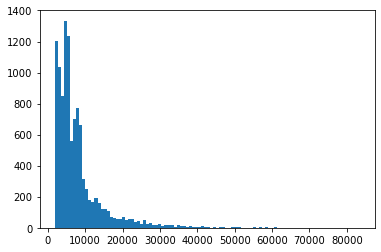

In [48]:
plt.hist(numerical['customer lifetime value'], bins=100)


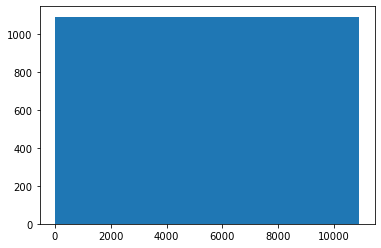

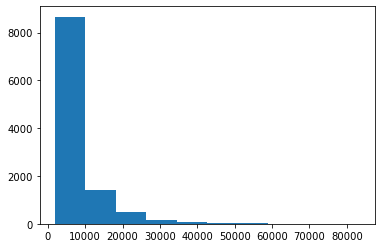

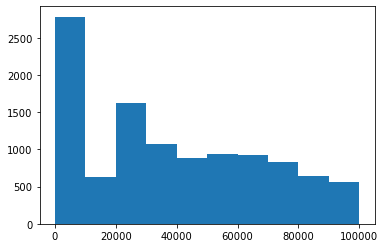

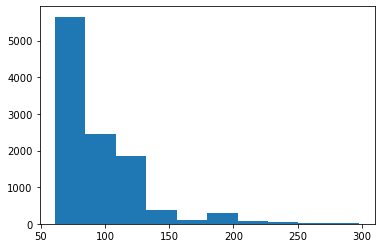

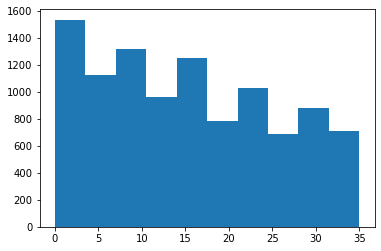

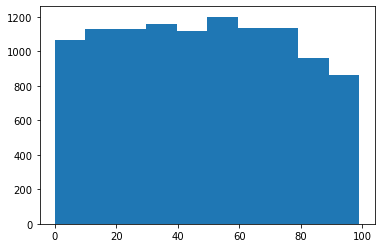

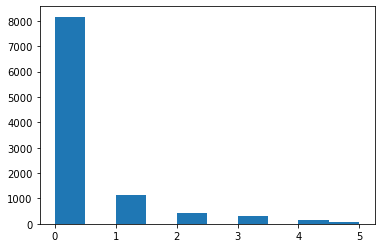

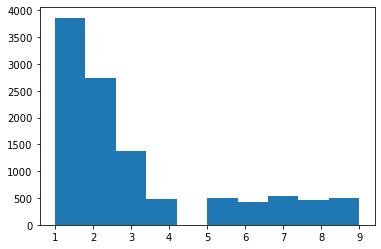

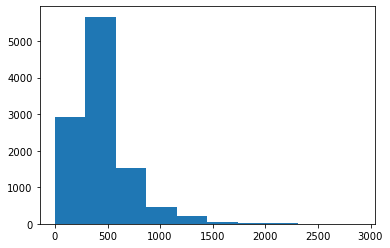

In [49]:
fig, ax = plt.subplots()
for column in numerical.columns:
    plt.hist(numerical[column])
    plt.show()


(array([2787.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,   50.,   60.,   64.,   63.,   64.,   37.,   66.,   82.,
          69.,   77.,  165.,  160.,  175.,  176.,  143.,  196.,  195.,
         124.,  161.,  137.,  103.,  109.,  102.,  110.,  101.,  108.,
         111.,  139.,   80.,  107.,  112.,   90.,   73.,  101.,  112.,
          66.,   90.,   61.,   96.,   80.,   93.,   94.,  102.,   80.,
          84.,   95.,   90.,   90.,  127.,   83.,  127.,   95.,  109.,
          95.,   80.,   67.,   90.,   92.,   86.,   90.,   95.,   62.,
         107.,   84.,  103.,   75.,   92.,   80.,   55.,   81.,   57.,
          65.,   63.,   76.,   58.,   64.,   68.,   46.,   84.,   68.,
          53.,   57.,   65.,   47.,   58.,   50.,   56.,   76.,   36.,
          58.]),
 array([    0.  ,   999.81,  1999.62,  2999.43,  3999.24,  4999.05,
         5998.86,  6998.67,  7998.48,  8998.29,  9998.1 , 10997.91,
        11997.72, 12997.53, 13997.34, 14997.15, 15996.96, 16996.77

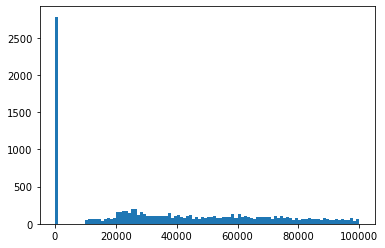

In [50]:
plt.hist(numerical['income'], bins=100)


# Do the distributions for different numerical variables look like a normal distribution ?

Not really, we will normalize them in lab 5 (as i saw in the instructions)

In [51]:
correlations_matrix = numerical.corr()
correlations_matrix

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.007958,0.012795,0.007325,0.002319,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months since last claim,0.007958,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months since policy inception,0.012795,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number of open complaints,0.007325,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number of policies,0.002319,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total claim amount,-0.000593,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


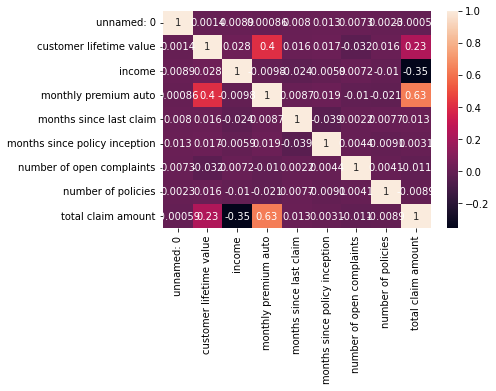

In [52]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

The 2 vbles that show highest correlation between them are "total claim amount" and 'monthly premium auto' although is not a strong correlation (0,4 ) , so I wont drop them as they migtyh be relevant for further analysis, also becuase they are stringly correlated (0,63)

# LAB 5 Processing Data

X-y split.

X = features y = target

In [127]:
y = data4['total claim amount']
X =  data4.drop(['total claim amount','unnamed: 0'], axis=1)
# X=X.drop(columns=['unnamed: 0'])
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)


print (X.shape, X_num.shape, X_cat.shape)  # check shape

(10910, 24) (10910, 7) (10910, 17)


In [128]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,NaN,31,NaN,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2
10908,11971.977650,64195,158,0.0,27,4.0,6


In [129]:
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.38119
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.00000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.00000
months since last claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.00000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.00000
number of open complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.00000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.00000


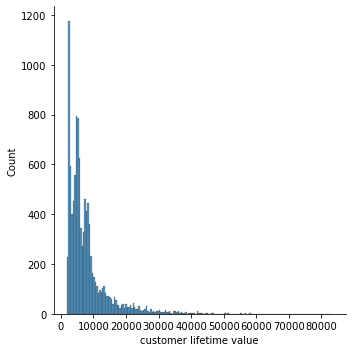

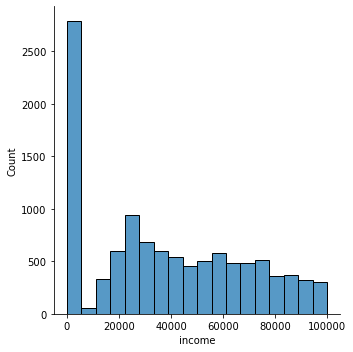

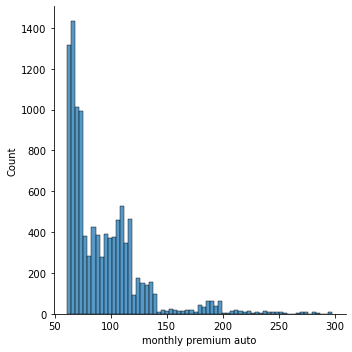

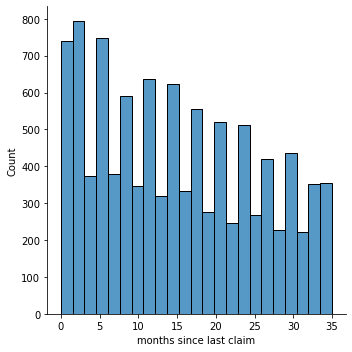

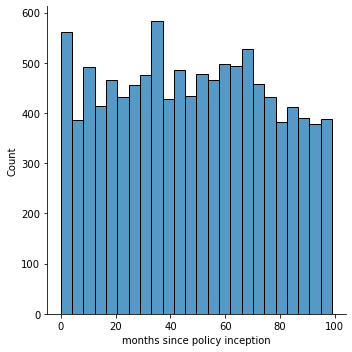

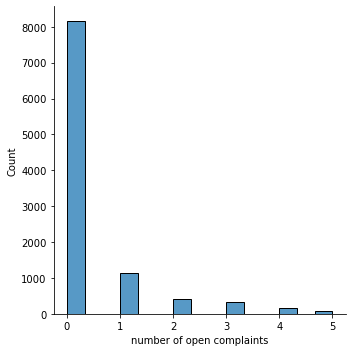

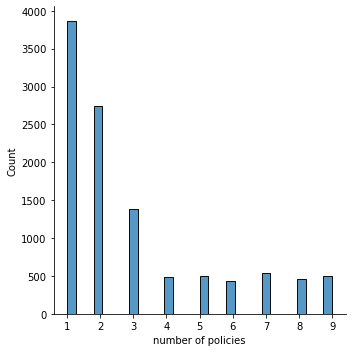

In [130]:




sns.displot(X_num['customer lifetime value'])
sns.displot(X_num['income'])
sns.displot(X_num['monthly premium auto'])
sns.displot(X_num['months since last claim'])
sns.displot(X_num['months since policy inception'])
sns.displot(X_num['number of open complaints'])
sns.displot(X_num['number of policies'])


# StandardScaler :

In [131]:
# from sklearn.preprocessing import StandardScaler

# transformer = StandardScaler().fit(X_num)

# X_standardized = transformer.transform(X_num)

# print(X_standardized.shape)
# X_standardized = pd.DataFrame(X_standardized, columns=X_num.columns)

In [132]:
# pd.DataFrame(X_standardized, columns=X_num.columns).corr


# NORMALIZE :

In [133]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)
print(X_normalized.shape)
print(X_normalized)
w = pd.DataFrame(X_normalized, columns=X_num.columns)
w

(10910, 7)
[[0.03575222 0.48038127 0.         ... 0.52525253 0.         1.        ]
 [0.00405905 0.         0.01265823 ... 0.26262626 0.         0.        ]
 [0.16026441 0.22143207 0.16455696 ... 0.31313131 0.         0.125     ]
 ...
 [0.27012165 0.3984457  0.5907173  ... 0.63636364 0.         0.125     ]
 [0.12371724 0.64207199 0.4092827  ... 0.27272727 0.8        0.625     ]
 [0.06090719 0.         0.16877637 ... 0.01010101 0.         0.25      ]]


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,NaN,0.313131,NaN,0.750
...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,NaN,0.404040,NaN,0.750
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625


# LAB 6:

In [143]:
X_categoricals= data4.select_dtypes([np.object])
display(X_categoricals)


/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_5477/1656229747.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_categoricals= data4.select_dtypes([np.object])


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


The column gender has only M and F values so its not suitable for OneHot encoder

Let's see which columns are suitable ( have 3 categorical values) 

In [144]:
print(X_categoricals['gender'].unique())
print(X_categoricals['education'].unique())
print(X_categoricals['employmentstatus'].unique())
print(X_categoricals['policy'].unique())

['M' 'F']
['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['Corporate L3' 'Personal L3' 'Personal L2' 'Corporate L2' 'Personal L1'
 'Special L1' 'Corporate L1' 'Special L3' 'Special L2']


None of the columns is suitable to OneHot encoder as they dont have 3 categorical values to reduce , I will use Label Encoder

In [174]:
from sklearn.preprocessing import LabelEncoder
X_cat = X_categoricals['gender']
label_encoded = LabelEncoder().fit(X_cat).transform(X_cat) # ordered wrt value counts
gender_encoded = pd.DataFrame(label_encoded)

display(gender_encoded.head(20))
gender_encoded.value_counts()

,0
0,1
1,0
2,1
3,1
4,0
5,1
6,0
7,1
8,1
9,0


0    5573
1    5337
dtype: int64

Now we concatenate

In [176]:
X = pd.concat([w, gender_encoded], axis=1) 

# LAB 7 :


In [175]:
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,0
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,1
4,0.087527,0.236795,0.236287,NaN,0.313131,NaN,0.750,0
...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,NaN,0.404040,NaN,0.750,0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,0


In [179]:
y = data4['total claim amount']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total claim amount, dtype: float64

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8728, 8)
(2182, 8)
(8728,)
(2182,)


In [183]:
X_train.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,0
3105,0.033983,0.000000,0.004219,0.742857,0.626263,0.0,0.250,1
6032,0.103048,0.963553,0.278481,0.542857,0.121212,0.0,0.250,0
157,0.036541,0.188696,0.274262,0.114286,0.626263,0.0,0.000,0
6964,0.061978,0.000000,0.029536,0.685714,0.313131,0.0,0.125,1
6349,0.007055,0.638721,0.004219,0.742857,0.818182,0.0,0.000,0


In [182]:
y_train.head()

3105    297.600000
6032    609.600000
157     604.800000
6964    489.600000
6349    208.598246
Name: total claim amount, dtype: float64

In [188]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').